In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [15]:
#g,h must be positive
#r,s change steepness
#x0,y0 change center

def E(s=1, y0=-1, y=np.linspace(-5,5,100)):
    
    E = 1/(1 + np.exp(-s * (y-y0)))
    #E = np.cos(s * (y-y0))
    
    return E

def F(r=1, x0=2, x=np.linspace(-5,5,100)):
    
    F = 1/(1 + np.exp(-r * (x-x0)))
    
    return F


def model(y_in,t, params):
    if params is None:
        g=2
        h=3

    else:        
        g = params['g']
        h = params['h']
        E = params['E']
        F = params['F']
        
    x = y_in[0]
    y = y_in[1]
    
    
    dxdt = g * (E-x)
    dydt = h * (F-y)
    
    return [dxdt, dydt]

def phase_plane(model, E, F, start = [1,2], t = np.linspace(0, 5, 100), g=2, h=3):
    fig0, ax0 = plt.subplots(1,1,figsize=(8,8))
    
    x = np.linspace(-5,5,100)
    y = np.linspace(-5,5,100)
    
    
    plt.plot(x,F(),'k',linewidth = 2)
    plt.plot(E(),y, 'k', linewidth = 2)
    
    for x in range(-5,6):
        for y in range(-5,6):
            y_out = odeint(model, [x,y], t, args = ({'g':g, 'h':h, 'E':E, 'F':F},))
            plt.plot(y_out[:,0],y_out[:,1])
   
    plt.axis([-5,5,-5,5])
    plt.xlabel('x', fontsize =18)
    plt.ylabel('y', fontsize = 18)
    plt.grid()
    

TypeError: unsupported operand type(s) for -: 'function' and 'float'

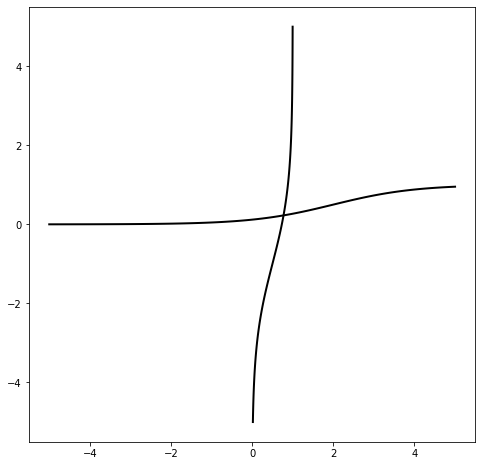

In [16]:
phase_plane(model, E, F)
